# Machine Learning Algorithms

## 5. Nearest Neighbors (Supervised)

### Nearest Neighbors Classification
- Non-parametric, instance-based learning or non-generalizing learning, classification is computed from a simple majority vote of the nearest neighbors of each point
- Query point is assigned the data class which has the most representatives within the nearest neighbors of the point
- sklearn implements two versions; KNeighborsClassifier (learning based on k nearest neighbors of each query point) and RadiusNeighborsClassifier (based on the number of neighbors within a fixed radius)

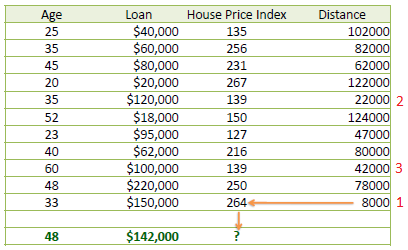

*If k=3 in the above, its takes average of closest 3* 

Examine the various effects of changing k
- Lower k tends to give the effect of 'overfit' at the boudaries
- use cross validation to find optimal k (tends to be >10)

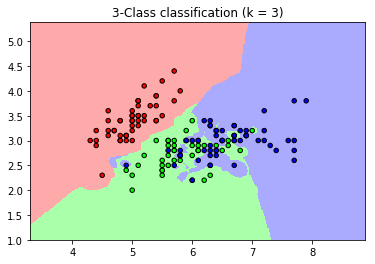

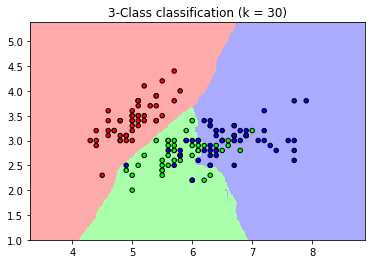

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [3, 30]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()

### Nearest Neighbors Regression¶
- Identical to the mechanics behind the classification

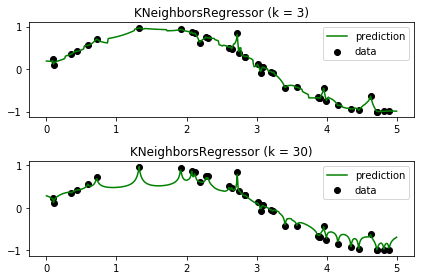

In [7]:
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

for i, n_neighbors in enumerate([3, 30]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')  # try uniform here and examine difference
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors))

plt.tight_layout()
plt.show()